<a href="https://colab.research.google.com/github/sfayhim/Linear_Regression_Model/blob/main/House_prices_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*House Prices Preprocessing Notebook 🏠*

 **IMPORT YOUR KAGGLE DATA SOURCES**

In [1]:
# load the data
import pandas as pd

df_train = pd.read_csv('./train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **About Dataset** 📊

### **Context:**

The dataset is centered around the real estate market, focusing on residential property sales. It's a rich, multidimensional dataset that offers extensive details about property features, reflecting the nuances and complexities of the housing market. The analysis of such data is vital for stakeholders including home buyers, sellers, real estate agents, and market analysts, providing them with insights into market trends, property valuations, and investment opportunities.

### **Dataset Description:**

The dataset encapsulates a broad spectrum of information about residential properties, spanning various aspects from basic configuration to detailed attributes that potentially influence the sale price. Key aspects covered in the dataset include:

**`Property Basics:`**
- Information about the type of dwelling, zoning classification, lot size, and street access.

**`Physical Characteristics:`**
- Descriptions of the lot shape, land contour, and utility features.

**`Quality and Condition:`**
- Evaluations encompassing the overall material and finish quality of the house, the state of various structural components, and the age of the property.

**`Space and Layout:`**
- Detailed information on living spaces, including size measurements, the number of rooms, bathrooms, and bedrooms, as well as kitchen quality.

**`Additional Features:`**
-  Insights into additional amenities and features such as fireplaces, garages, pools, and other miscellaneous elements.
  

**`Sale Details:`**
- Information regarding the sale transaction, including the date of sale, type, and condition of sale.


# **1. Data Acquisition & Exploration** 🧐

First, we need to import the libraries and load the dataset and familiarize ourselves with it's basic structure.
We'll check the top rows, understand the types of data we're dealing with.

- **Importing the libraries we'll be using for this analysis.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **Loading the dataset and checking the top 7 rows.**


In [3]:
df_train.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [4]:
#If u want to import data from your drive:
#from google.colab import drive
#drive.mount("/content/drive")
#df=pd.read_csv("/content/drive/MyDrive/train.csv")

- **Check the dimensions of the data**

In [5]:
df_train.shape

(1460, 81)

- **Check the last rows**

In [6]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


- **check columns name**

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

-  **Sneap Peak of the dataset.**


In [8]:
#sns.pairplot(df_train)
#plt.show()

- **Statistical Overview of the dataset.**

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- **Check data unique in each column**


In [10]:
#number of unique values in each column
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

#  **2. Dealing with Missing Values** 🧽

In [11]:
#number of missing values in each column
df_train.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [12]:
# only show columns with missing values in ascending order
(df_train).isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
# percentage of missing values


<Axes: >

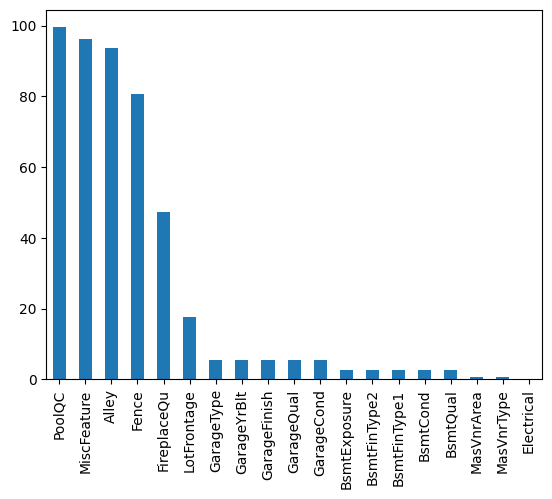

In [14]:
missing=df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) / len(df_train) * 100
missing.plot.bar()


### **Checking the columns with most missing values**


#### **1. PoolQC: Pool quality**

- Ex:	Excellent
- Gd:	Good
- TA:	Average/Typical
- Fa:	Fair
- NA:	No Pool


In [15]:
df_train["PoolQC"].dtype

dtype('O')

In [16]:
df_train["PoolQC"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

#### **2. MiscFeature: Miscellaneous feature not covered in other categories**
        
- Elev:	Elevator
- Gar2:	2nd Garage (if not described in garage section)
- Othr:	Other
- Shed:	Shed (over 100 SF)
- TenC:	Tennis Court
- NA:	None

In [17]:
df_train["MiscFeature"].dtype

dtype('O')

In [18]:
df_train["MiscFeature"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: MiscFeature, dtype: object

#### **3. Alley: Type of alley access to property**

- Grvl:	Gravel
- Pave:	Paved
- NA: 	No alley access

In [19]:
df_train["Alley"].dtype

dtype('O')

In [20]:
df_train["Alley"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

#### **4. Fence**

- GdPrv:	Good Privacy
- MnPrv:	Minimum Privacy
- GdWo:	Good Wood
- MnWw:	Minimum Wood/Wire
- NA: 	No Fence

In [21]:
df_train["Fence"].dtype

dtype('O')

In [22]:
df_train["Fence"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

#### **5. MasVnrType: Masonry veneer type**

- BrkCmn:	Brick Common
- BrkFace:	Brick Face
- CBlock:	Cinder Block
- None:	 None
- Stone:	Stone

In [23]:
df_train["MasVnrType"].dtype

dtype('O')

In [24]:
df_train["MasVnrType"].head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

##**Drop columns**

- Drop these columns because they have more than 50% missing values and they don't have impact on SalePrice.

In [25]:
df_train = df_train.drop(["PoolQC","MiscFeature","Alley","Fence","MasVnrType"],axis=1)

In [26]:
# percentage of missing values
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) / len(df_train) * 100

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [27]:
df_train.shape

(1460, 76)

###**Drop Rows**

- We have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In [28]:
df_train.dropna(subset=["Electrical"],inplace=True)

In [29]:
# Drop rows with missing values in specific columns
df_train.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], inplace=True)

### **Using Simple Imputer**

In [30]:
from sklearn.impute import SimpleImputer, KNNImputer

In [31]:
# Create a SimpleImputer with the strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

In [32]:
df_train.loc[:,'FireplaceQu'] = imputer.fit_transform(df_train[['FireplaceQu']])

In [33]:
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False)

LotFrontage     252
BsmtExposure     31
BsmtFinType2     31
BsmtQual         30
BsmtCond         30
BsmtFinType1     30
MasVnrArea        8
dtype: int64

### **Using fillna()**

In [34]:
# Impute missing values for categorical columns with the most frequent value
categorical_columns = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for column in categorical_columns:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False)

LotFrontage    252
MasVnrArea       8
dtype: int64

In [35]:
# Impute missing values in MasVnrArea with the median
imputer = SimpleImputer(strategy='median')
df_train.loc[:,'MasVnrArea'] = imputer.fit_transform(df_train[['MasVnrArea']])

### **Using K-Nearest Neighbors KNN**

In [36]:
knn_imputer = KNNImputer()
df_train['LotFrontage'] = knn_imputer.fit_transform(df_train[['LotFrontage']])

In [37]:
df_train.shape

(1378, 76)

In [38]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

#  **3. Dealing with Duplicates & Outliers**

In [39]:
# Check for duplicate rows
duplicates = df_train[df_train.duplicated()]
duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [40]:
# Remove duplicate rows from the DataFrame
df_train = df_train.drop_duplicates()
# Verify that duplicates are removed
duplicates = df_train[df_train.duplicated()]
duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [41]:
df_train.shape

(1378, 76)

##**Outliers** :
is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

**GrLivArea:** Ground Living Area: represents the total living area above ground in square feet.and it is a significant factor in determining house prices.

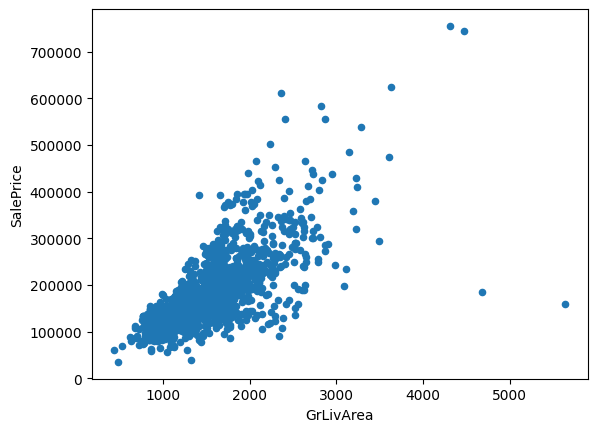

In [42]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

In [43]:
# Detect outliers using Z-score
from scipy.stats import zscore
z_scores = zscore(df_train[['GrLivArea', 'SalePrice']])
outliers = (z_scores > 3).all(axis=1)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1378, dtype: bool

##**The zscore function**
Calculates the z-scores of a dataset. A z-score represents how many standard deviations a particular data point is from the mean of the dataset. It's a measure of how far a data point is from the mean in terms of standard deviations.

The threshold value of 3 in **(z_scores > 3).all(axis=1)** is a common choice in practice, but it is somewhat arbitrary. The idea is to identify data points that are more than 3 standard deviations away from the mean, which is a typical threshold for considering a data point as an outlier when using the Z-score method.

Here's a brief explanation:

- In a standard normal distribution, about 99.7% of the data falls within three standard deviations from the mean.
- Choosing a threshold of 3 means that you are considering data points that are in the top or bottom 0.3% of the distribution as potential outliers.

In [44]:
# Remove outliers
df_train = df_train[~outliers]

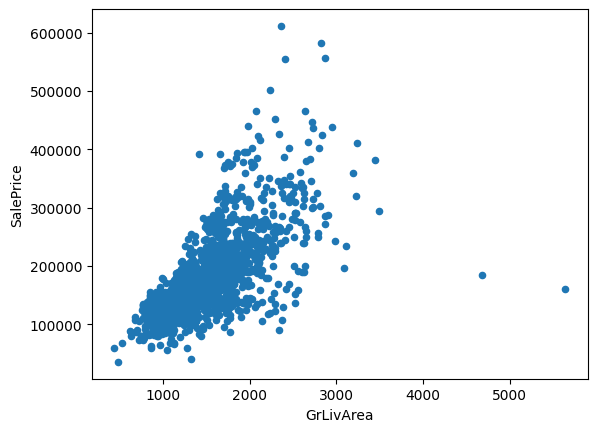

In [45]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

# **4. Dealing with Categorical data**

In [46]:
# One-hot encoding for categorical variable 'GarageType'
df_train = pd.get_dummies(df_train, columns=['GarageType'], drop_first=True)

In [47]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,1,0,0,0,0


In [48]:
#Label encoding for the other categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col])


In [49]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,3,65.0,8450,1,3,3,0,4,...,2,2008,8,4,208500,1,0,0,0,0
1,2,20,3,80.0,9600,1,3,3,0,2,...,5,2007,8,4,181500,1,0,0,0,0
2,3,60,3,68.0,11250,1,0,3,0,4,...,9,2008,8,4,223500,1,0,0,0,0
3,4,70,3,60.0,9550,1,0,3,0,0,...,2,2006,8,0,140000,0,0,0,0,1
4,5,60,3,84.0,14260,1,0,3,0,2,...,12,2008,8,4,250000,1,0,0,0,0


# **5. Feature Scaling and Normalization:**



Min-Max scaling transforms the selected features to a specified range, typically between 0 and 1.

###**Min-Max Scaling:**
Min-Max scaling is a linear transformation technique that processes each feature individually, scaling it to a given range. In this case, the range is
[0,1].

###**Why Use Min-Max Scaling?**
It ensures that all features have the same scale, preventing certain features from dominating others during model training.

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to scale
columns_to_scale = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'GrLivArea', 'OverallQual',
                     'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                     'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                     'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Create a MinMaxScaler with the specified range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the selected columns
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])


In [51]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,0.000000,0.235294,3,0.150685,0.033420,1,3,3,0,4,...,0.090909,0.50,8,4,0.300495,1,0,0,0,0
1,0.000685,0.000000,3,0.202055,0.038795,1,3,3,0,2,...,0.363636,0.25,8,4,0.253648,1,0,0,0,0
2,0.001371,0.235294,3,0.160959,0.046507,1,0,3,0,4,...,0.727273,0.50,8,4,0.326521,1,0,0,0,0
3,0.002056,0.294118,3,0.133562,0.038561,1,0,3,0,0,...,0.090909,0.00,8,0,0.181643,0,0,0,0,1
4,0.002742,0.235294,3,0.215753,0.060576,1,0,3,0,2,...,1.000000,0.50,8,4,0.372500,1,0,0,0,0


In [52]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1371.0,0.500535,0.288738,0.0,0.249829,0.501714,0.748801,1.0
MSSubClass,1371.0,0.211782,0.241918,0.0,0.000000,0.176471,0.294118,1.0
MSZoning,1371.0,3.018964,0.625205,0.0,3.000000,3.000000,3.000000,4.0
LotFrontage,1371.0,0.169644,0.074560,0.0,0.133562,0.170141,0.198630,1.0
LotArea,1371.0,0.043577,0.047420,0.0,0.029980,0.038734,0.048526,1.0
...,...,...,...,...,...,...,...,...
GarageType_Attchd,1371.0,0.631656,0.482531,0.0,0.000000,1.000000,1.000000,1.0
GarageType_Basment,1371.0,0.013858,0.116946,0.0,0.000000,0.000000,0.000000,1.0
GarageType_BuiltIn,1371.0,0.061999,0.241241,0.0,0.000000,0.000000,0.000000,1.0
GarageType_CarPort,1371.0,0.006565,0.080785,0.0,0.000000,0.000000,0.000000,1.0


# **7. Creating Derived Features:**

In [53]:
# Create a new feature 'TotalBathrooms'
df_train['TotalBathrooms'] = df_train['FullBath'] + 0.5 * df_train['HalfBath'] + df_train['BsmtFullBath'] + 0.5 * df_train['BsmtHalfBath']


In [54]:
# Delete the original columns
df_train.drop(['FullBath', 'HalfBath', 'BsmtFullBath'], axis=1, inplace=True)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler


In [56]:
# Assuming X contains features and y is the target variable
X = df_train.drop('SalePrice',axis=1)
y = df_train['SalePrice']

In [57]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [58]:
# Train the linear regression model
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [62]:
# Make predictions on the testing set
y_pred = LR.predict(X_test)

In [64]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
a = 1 - mse
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {a}')

Mean Squared Error: 0.002929368424428743
R-squared: 0.8233939085549075
Accuracy: 0.9970706315755713
